In [25]:
state<- read.csv('data/state.csv')
dfw <- read.csv('data/dfw_airline.csv')
sp500_px <- read.csv('data/sp500_px.csv')
sp500_sym <- read.csv('data/sp500_sym.csv')
kc_tax <- read.csv('data/kc_tax.csv')
lc_loans <- read.csv('data/lc_loans.csv')
airline_stats <- read.csv('data/airline_stats.csv')
airline_stats$airline <- ordered(airline_stats$airline, levels=c('Alaska', 'American', 'Jet Blue', 'Delta', 'United', 'Southwest'))
state

State,Population,Murder.Rate,Abbreviation
Alabama,4779736,5.7,AL
Alaska,710231,5.6,AK
Arizona,6392017,4.7,AZ
Arkansas,2915918,5.6,AR
California,37253956,4.4,CA
Colorado,5029196,2.8,CO
Connecticut,3574097,2.4,CT
Delaware,897934,5.8,DE
Florida,18801310,5.8,FL
Georgia,9687653,5.7,GA


In [22]:
mean(state[['Population']])
mean(state[['Population']], trim=0.1)

[1] 6162876

[1] 4783697

#### average murder rate fro country

In [3]:
#install.packages('matrixStats')
library('matrixStats')

In [4]:
weighted.mean(state[['Murder.Rate']], w= state[['Population']])
weightedMedian(state[['Murder.Rate']], w= state[['Population']])

[1] 4.445834

[1] 4.4

## Percentiles and Boxplots


In [5]:
quantile(state[['Murder.Rate']], p=c(.05, .25, .5, .95))

5%   25%   50%   95% 
1.600 2.425 4.000 6.510

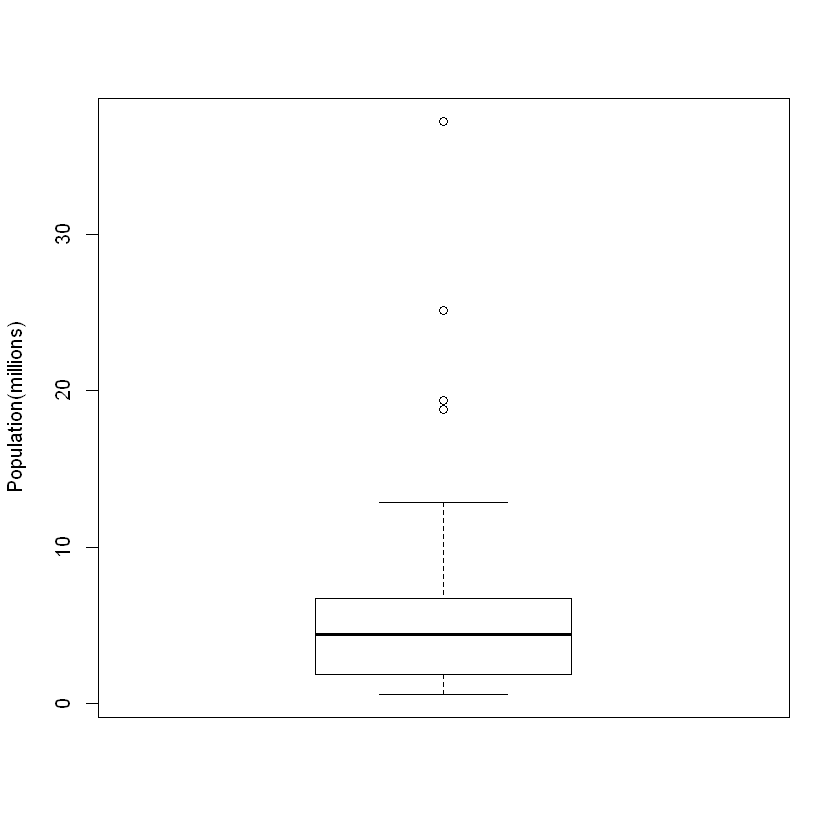

In [6]:
boxplot(state[['Population']]/1000000, ylab='Population(millions)')

### Frequency Table and Histograms

In [7]:
breaks <- seq(from=min(state[['Population']]), to=max(state[['Population']]), length=11)
#breaks
pop_freq <- cut(state[['Population']], breaks= breaks, right= TRUE, include.lowest = TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

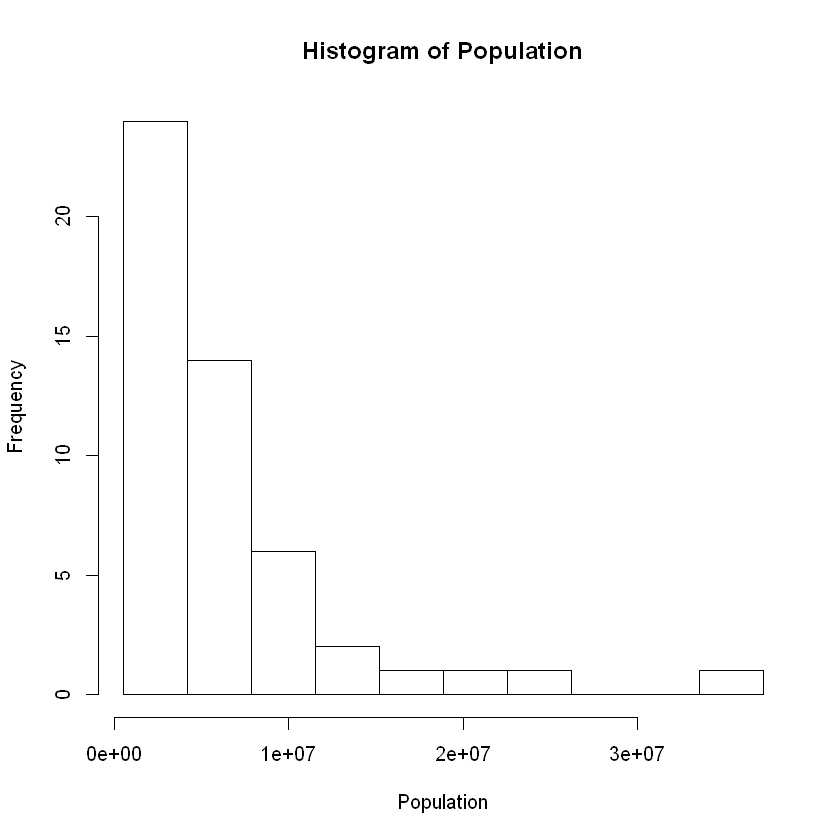

In [8]:
hist(state[['Population']], breaks= breaks, main= 'Histogram of Population', xlab= 'Population')


### Density Estimates

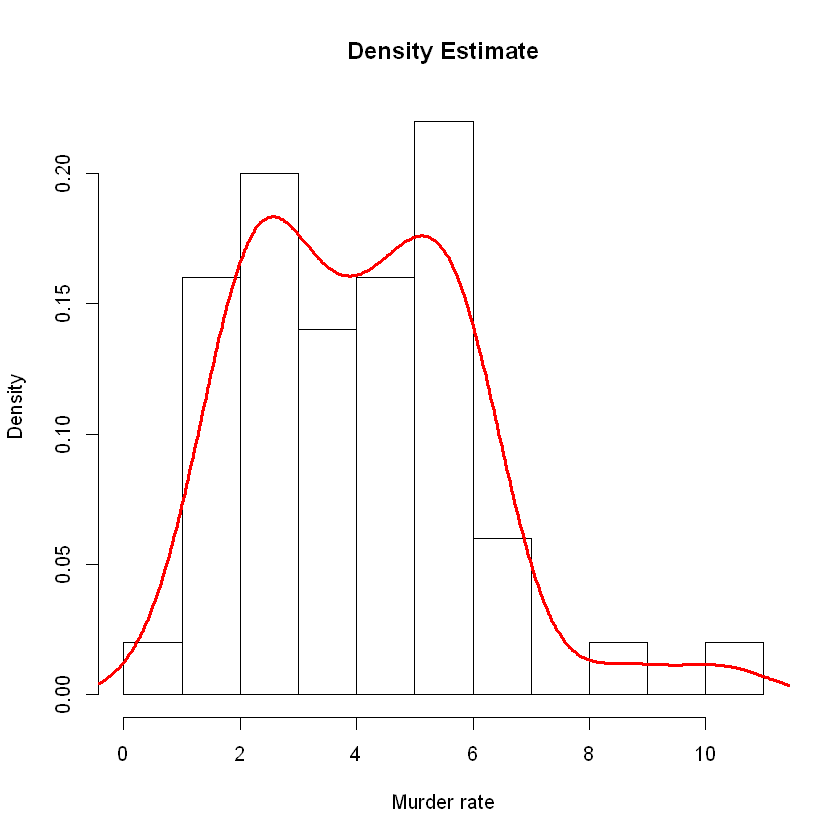

In [9]:
hist(state[['Murder.Rate']], freq=F, main= 'Density Estimate', xlab= 'Murder rate')
lines(density(state[['Murder.Rate']]), lwd=3, col="red")

### Exploring Binary and Categorical Data

In [10]:
barplot(as.matrix(dfw)/6, cex.axis=.5)

ERROR: Error in as.matrix(dfw): object 'dfw' not found


### Correlation

In [26]:
etfs <- sp500_px[row.names(sp500_px)>"2012-07-01", sp500_sym[sp500_sym$sector=="etf", 'symbol']]